In [1]:
import numpy as np
import pickle
import os
import pandas as pd
from keras.models import load_model
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,RMSprop
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.metrics as metrics
import glob
import cv2
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.applications import VGG16
#from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.utils import array_to_img,img_to_array,load_img
from tensorflow.keras.metrics import Precision, Recall

In [2]:
#Load the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras.preprocessing import image as keras_image


In [4]:
data_dir = 'Preprocessed_Dataset/'

In [36]:
count = []
class_name = []
for image_class in os.listdir(data_dir):
    class_name.append(image_class)
    im = os.listdir(os.path.join(data_dir, image_class))
    count_r = len(im)
    count.append(count_r)
df = pd.DataFrame()
df['class_name'] = class_name
df['no_of_images'] = count

In [37]:
df

,class_name,no_of_images
0,Healthy-fenugreek,1575
1,powdery-mildew-fenugreek,1589
2,spinach-Cladosporium_Leaf_spot,189
3,spinach-healthy,1274
4,new-alternaria,5432


In [38]:
df.to_excel('proceesed_dataset.xlsx')

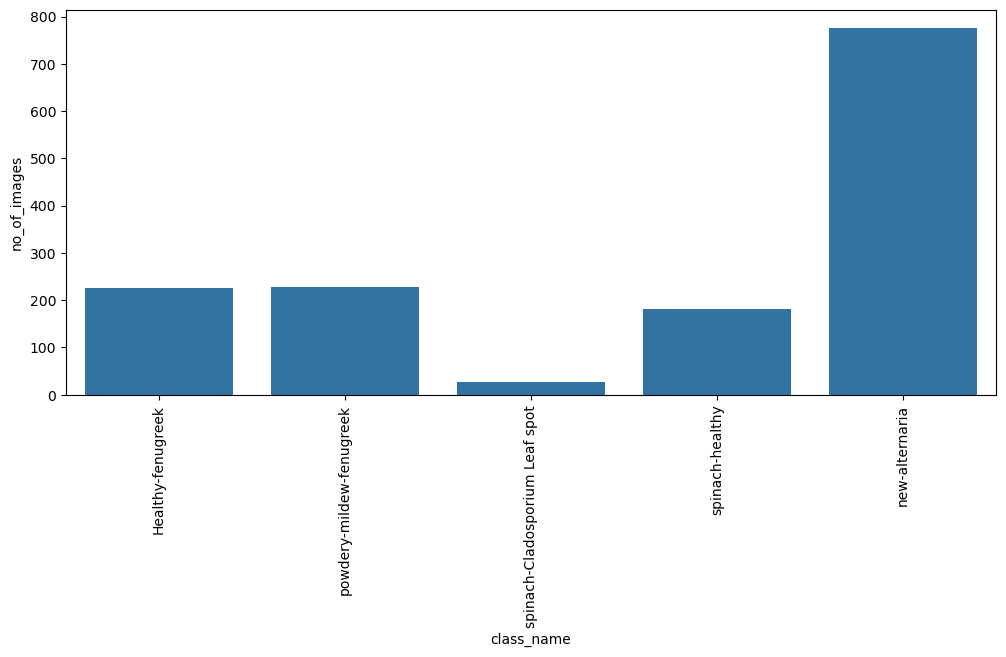

In [9]:
# names = df.class_name
# values = df.no_of_images

plt.figure(figsize=(12,5))

# plt.subplot(131)
# plt.bar(names, values)
import seaborn as sns
import matplotlib.pyplot as plt
 
# read a tips.csv file from seaborn library
# df = pd.read_csv('data.csv')

# count plot on single categorical variable
sns.barplot(y = 'no_of_images',x = 'class_name',data = df, )
plt.xticks(rotation=90)
 
# Show the plot
plt.show()

In [10]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(data_dir, batch_size=52,
    image_size=(256, 256),
    shuffle=True,)

Found 1437 files belonging to 5 classes.


2024-04-08 14:57:29.594031: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
data = train_data.map(lambda x,y: (1.0/255, y))

In [12]:
batch = data.as_numpy_iterator().next()

2024-04-08 14:57:31.361032: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1437]
	 [[{{node Placeholder/_4}}]]
2024-04-08 14:57:31.361209: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1437]
	 [[{{node Placeholder/_4}}]]


In [34]:
from PIL import Image, ImageDraw, ImageFont
import os

# Base directory where the other directories are located
base_directory = 'Preprocessed_Dataset'
directories_o = os.listdir('Preprocessed_Dataset')
directories = [os.path.join(base_directory, i) for i in (directories_o)]

# Initialize list to store selected image paths
selected_images = []

# Iterate through each directory to select one image
for directory in directories:
    # Here we're just getting a list of .png files in each directory
    image_files = [file for file in os.listdir(directory)]
    if image_files:
        # Append the first image found to the selected_images list
        selected_images.append(os.path.join(directory, image_files[18]))

# Assuming all images are of the same size and that size is 256x256 pixels
image_size = (256, 256)
grid_width = 3
grid_height = 2  # 3x2 grid to hold 5 images
combined_image_size = (grid_width * image_size[0], grid_height * image_size[1])

# Create a new image with a grey background to hold the grid
combined_image = Image.new('RGB', combined_image_size, color='grey')
vertical_spacing = 20 
# Use a simple font
font = ImageFont.load_default()

# Iterate through the selected images to place them in the grid
for index, img_path in enumerate(selected_images):
    img = Image.open(img_path)
    img.thumbnail(image_size, Image.Resampling.LANCZOS)
    
    # Calculate the grid position
    x = index % grid_width * image_size[0]
    y = index // grid_width * (image_size[1] - 50)

    
    # Paste the image into the combined image
    combined_image.paste(img, (x, y))
    
    # Label the image
    draw = ImageDraw.Draw(combined_image)
    draw.text((x+5, y+5), chr(65 + index), (255,255,255), font=font)

# Save the final image
combined_image.save('combined_view.png')

# This would save 'combined_view.png' in the current working directory.


In [13]:
class_names = train_data.class_names
class_names
num_classes = len(class_names)

In [14]:
class_names

['Healthy-fenugreek',
 'new-alternaria',
 'powdery-mildew-fenugreek',
 'spinach-Cladosporium Leaf spot',
 'spinach-healthy']

2024-04-08 14:58:33.422234: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1437]
	 [[{{node Placeholder/_0}}]]
2024-04-08 14:58:33.422523: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1437]
	 [[{{node Placeholder/_4}}]]


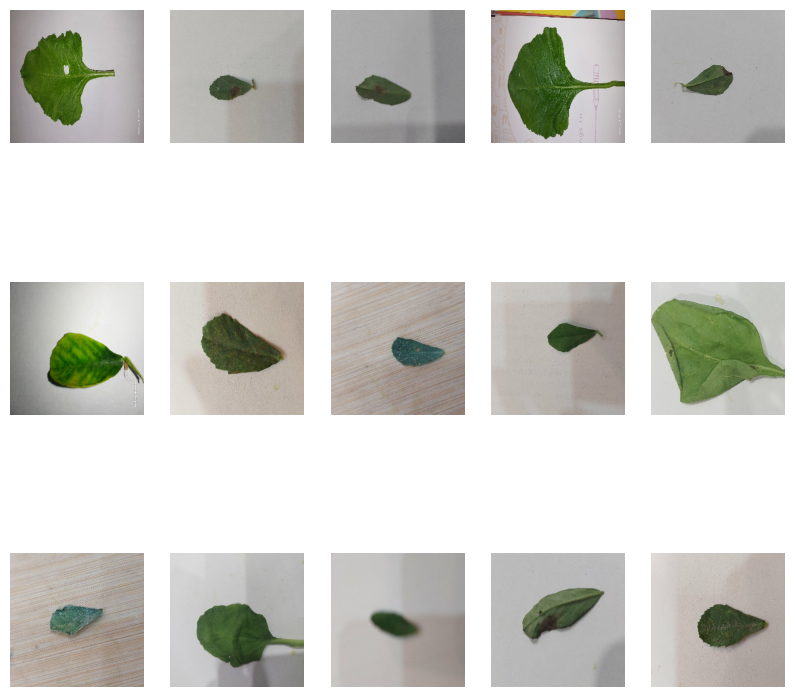

In [19]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_data.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))

        plt.axis("off")

In [21]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=False):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [22]:
train_generator, validation_generator, test_ds = get_dataset_partitions_tf(train_data)

In [23]:
from tensorflow.keras.models import Model
inputs = tf.keras.layers.Input(shape=(256,256,3))
x =  tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)

x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.Conv2D(128, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)

x = tf.keras.layers.Conv2D(128, (3,3), activation='relu')(x)
x = tf.keras.layers.Conv2D(256, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Conv2D(256, (3,3), activation='relu')(x)
x = tf.keras.layers.Conv2D(512, (3,3), activation='relu')(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dense(num_classes, activation='softmax')(x) 
model = Model(inputs=inputs, outputs=x)

In [24]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [25]:
r = model.fit(
        train_generator,
        epochs=60,
        validation_data=validation_generator)

Epoch 1/60


ValueError: in user code:

    File "/home/gdt-ws4/anaconda3/envs/myenv/lib/python3.9/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/gdt-ws4/anaconda3/envs/myenv/lib/python3.9/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/gdt-ws4/anaconda3/envs/myenv/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/gdt-ws4/anaconda3/envs/myenv/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/gdt-ws4/anaconda3/envs/myenv/lib/python3.9/site-packages/keras/engine/training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "/home/gdt-ws4/anaconda3/envs/myenv/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/gdt-ws4/anaconda3/envs/myenv/lib/python3.9/site-packages/keras/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/gdt-ws4/anaconda3/envs/myenv/lib/python3.9/site-packages/keras/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/gdt-ws4/anaconda3/envs/myenv/lib/python3.9/site-packages/keras/losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/gdt-ws4/anaconda3/envs/myenv/lib/python3.9/site-packages/keras/backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 5) are incompatible


In [ ]:
train_loss = r.history['loss']
val_loss = r.history['val_loss']   
train_accuracy = r.history['accuracy']
val_accuracy = r.history['val_accuracy']

# Plot the training and validation loss per epoch
plt.plot(range(1, len(train_loss) + 1), train_loss, 'b', label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy per epoch
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

train_loss = r.history['loss']
val_loss = r.history['val_loss']
train_accuracy = r.history['accuracy']
val_accuracy = r.history['val_accuracy']

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the training and validation loss
axs[0].plot(range(1, len(train_loss) + 1), train_loss, 'b', label='Training Loss')
axs[0].plot(range(1, len(val_loss) + 1), val_loss, 'r', label='Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training and Validation Loss')
axs[0].legend()

# Plot the training and validation accuracy
axs[1].plot(range(1, len(train_accuracy) + 1), train_accuracy, 'b', label='Training Accuracy')
axs[1].plot(range(1, len(val_accuracy) + 1), val_accuracy, 'r', label='Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Training and Validation Accuracy')
axs[1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the combined plot as a single image
plt.savefig('loss_accuracy_training_base_plot.png')

# Show the combined plot
plt.show()


In [ ]:
# IMAGE_SIZE = 256

# test_generator = ImageDataGenerator()
# test_data_generator = test_generator.flow_from_directory(
#     test_ds ,
#      target_size=(IMAGE_SIZE, IMAGE_SIZE),
#     batch_size=32,
#     shuffle=False)
# test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_ds)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)


In [ ]:
predictions = model.predict_generator(test_ds)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

scores = model.evaluate(test_ds)
scores

In [ ]:
import numpy as np
plt.figure(figsize=(20, 20))
for images_batch, labels_batch in test_ds:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        first_image = images_batch[i].numpy().astype('uint8')
        first_label = labels_batch[i].numpy()
        batch_prediction = model.predict(images_batch)
        confidence = round(100 * (np.max(batch_prediction[i])), 2)
        plt.imshow(first_image)
        predicted_class = class_names[np.argmax(batch_prediction[i])]
        plt.title(f"\n Predicted: {predicted_class}.\n actual label: {class_names[first_label]}.\n Confidence: {confidence}%")

        

In [ ]:
model.save('base_model.h5')

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools
import matplotlib.pyplot as plt

# Assuming test_ds is your testing dataset and it's not shuffled.
# The model.predict_generator method is deprecated, use model.predict instead.
predictions = model.predict(test_ds)
predicted_classes = np.argmax(predictions, axis=-1)

# Retrieve the true labels from the test_ds
# true_classes = test_ds.classes  # This works if test_ds is a Keras ImageDataGenerator instance
# # If test_ds is a tf.data.Dataset, you would extract the labels differently.

# # Calculate the performance metrics
# report = classification_report(true_classes, predicted_classes)
# conf_matrix = confusion_matrix(true_classes, predicted_classes)

# # Print the classification report
# print(report)

# # Print the confusion matrix
# print(conf_matrix)

# # Print the individual scores
# accuracy = accuracy_score(true_classes, predicted_classes)
# print(f'Accuracy: {accuracy:.2f}')


In [ ]:
predicted_classes

In [ ]:
test_ds

In [ ]:
import tensorflow as tf

# Function to extract true labels from the dataset
def extract_true_labels(ds):
    true_labels = []
    for img, label in ds.unbatch().as_numpy_iterator():
        true_labels.append(label)
    return np.array(true_labels)

# Extract true labels
true_labels = extract_true_labels(test_ds)

# Generate predictions using the model
predictions = model.predict(test_ds)
predicted_classes = np.argmax(predictions, axis=-1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

# Define the plot_confusion_matrix function from previous examples
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Assuming class_labels is a list of class names corresponding to your dataset
# You'll need to adjust this based on your specific dataset
class_labels = ['Healthy-fenugreek', 'new-alternaria', 'powdery-mildew-fenugreek', 'spinach-Cladosporium_Leaf_spot','spinach-healthy']  # Adjust accordingly

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plot_confusion_matrix(conf_matrix, classes=class_labels, title='Confusion Matrix')

# Calculate and print other performance metrics
print(classification_report(true_labels, predicted_classes, target_names=class_labels))


In [ ]:
from tensorflow.keras.models import load_model

# Replace 'path/to/your/model.h5' with the actual path to your .h5 file
model_path = 'base_model.h5'

# Load the model
model = load_model(model_path)

In [ ]:
model

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Extract true labels from test_ds
true_labels = []
for img, label in test_ds:
    true_labels.extend(label.numpy())

# Make predictions
predictions = model.predict(test_ds)
predicted_classes = np.argmax(predictions, axis=-1)

# Calculate accuracy manually
manual_accuracy = accuracy_score(true_labels, predicted_classes)
print(f'Manual Accuracy: {manual_accuracy:.4f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)


In [ ]:
true_labels

In [ ]:
predicted_classes

In [ ]:
scores = model.evaluate(test_ds)
scores

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

# Function to extract true labels from test_ds
def get_true_labels(test_ds):
    true_labels = []
    for images, labels in test_ds.unbatch().as_numpy_iterator():
        true_labels.append(labels)
    return np.array(true_labels)

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Assuming you already have model and test_ds ready
# 1. Get true labels from test_ds
true_labels = get_true_labels(test_ds)

# 2. Predict on test_ds
predictions = model.predict(test_ds)
predicted_classes = np.argmax(predictions, axis=1)

# 3. Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

# 4. Plot the confusion matrix
# Note: Replace ['Class1', 'Class2', ...] with your actual class names
class_names = class_names  # Adjust based on your dataset
plt.figure(figsize=(10, 8))
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()


In [70]:
data_dir = 'Original_Dataset//'
class_folders = os.listdir(data_dir)
image_paths = []
labels = []

for class_folder in class_folders:
    class_path = os.path.join(data_dir, class_folder)
    image_files = os.listdir(class_path)
    for image_file in image_files:
        image_path = os.path.join(class_path, image_file)
        image_paths.append(image_path)
        labels.append(class_folder)

df = pd.DataFrame({'image_path': image_paths, 'label': labels})
print('path of the image: ',df.loc[1]['image_path'])
print('label of the certain image: ',df.loc[1]['label'])
train_df, test_df = train_test_split(df, test_size=0.3, stratify=df['label'], random_state=42)
test_df, val_df = train_test_split(test_df, test_size=0.1, stratify=test_df['label'], random_state=42)


batch_size = 40

train_datagen = ImageDataGenerator(

    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='sparse'  # Changed from 'categorical' to 'sparse'
)
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='sparse'  # Changed from 'categorical' to 'sparse'
)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='sparse',  # Changed from 'categorical' to 'sparse'
    shuffle=False
)


class_labels_dict = {class_label: idx for idx, class_label in enumerate(np.unique(df['label']))}
num_classes = len(class_labels_dict)
from tensorflow.keras.layers import Layer, Attention, Dropout  # Add Dropout import  
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  
import numpy as np
# Define the Self-Attention Layer
class SelfAttention(Layer):
    def __init__(self, **kwargs):
          super(SelfAttention, self).__init__(**kwargs)

    def build(self, input_shape):

        self.w_q = self.add_weight(name='q_kernel',    
                                  shape=(input_shape[-1], input_shape[-1]),
                                  initializer='uniform',
                                  trainable=True)

        self.w_k = self.add_weight(name='k_kernel',
                                  shape=(input_shape[-1], input_shape[-1]),
                                  initializer='uniform',
                                  trainable=True)

        self.w_v = self.add_weight(name='v_kernel',
                                  shape=(input_shape[-1], input_shape[-1]),
                                  initializer='uniform',
                                  trainable=True)

        super(SelfAttention, self).build(input_shape)

    def call(self, x):    
        q = tf.matmul(x, self.w_q)
        k = tf.matmul(x, self.w_k)
        v = tf.matmul(x, self.w_v)
        attn_scores = tf.matmul(q, k, transpose_b=True)
        attn_scores = tf.nn.softmax(attn_scores, axis=-1)
        output = tf.matmul(attn_scores, v)
        return output


# MobileNetV2 with attention mechanism

base_model = MobileNetV2(weights='imagenet', include_top=False)   
x = base_model.output
x = SelfAttention()(x)  # Add the attention mechanism layer here
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Include the Dropout layer
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
# Unfreeze more layers in the MobileNetV2 model
n = 40
for layer in model.layers[:-n]:
      layer.trainable = True

# Adjust the learning rate for fine-tuning
learning_rate_finetune = 0.0001
# Compile the model with the updated learning rate
model.compile(optimizer=Adam(learning_rate=learning_rate_finetune),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tuning
epochs_finetune = 100
history_finetune = model.fit(train_generator, epochs=epochs_finetune, validation_data=val_generator)
# After training, you can evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
# Save the Fine-tuned Model
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_finetune.history['accuracy'])
plt.plot(history_finetune.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_finetune.history['loss'])
plt.plot(history_finetune.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Save the figure
plt.savefig('accuracy_loss_graph_'+'.png')
plt.show()

path of the image:  Original_Dataset//Healthy-fenugreek/20240316_205739.jpg
label of the certain image:  Healthy-fenugreek
Found 1005 validated image filenames belonging to 5 classes.
Found 44 validated image filenames belonging to 5 classes.
Found 388 validated image filenames belonging to 5 classes.
Epoch 1/100


KeyboardInterrupt: 

In [34]:
y_pred = model.predict(test_generator, steps=len(test_generator))

68/68 [==============================] - 18s 267ms/step


In [36]:
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=-1)

68/68 [==============================] - 13s 191ms/step


In [44]:
model.save('mobilenet_model.h5')

68/68 [==============================] - 12s 179ms/step
                                precision    recall  f1-score   support

             Healthy-fenugreek       1.00      0.99      0.99       425
                new-alternaria       0.93      0.94      0.94      1467
      powdery-mildew-fenugreek       0.80      0.76      0.78       429
spinach-Cladosporium_Leaf_spot       1.00      1.00      1.00        51
               spinach-healthy       0.99      1.00      0.99       344

                      accuracy                           0.93      2716
                     macro avg       0.94      0.94      0.94      2716
                  weighted avg       0.93      0.93      0.93      2716

Accuracy: 0.9300


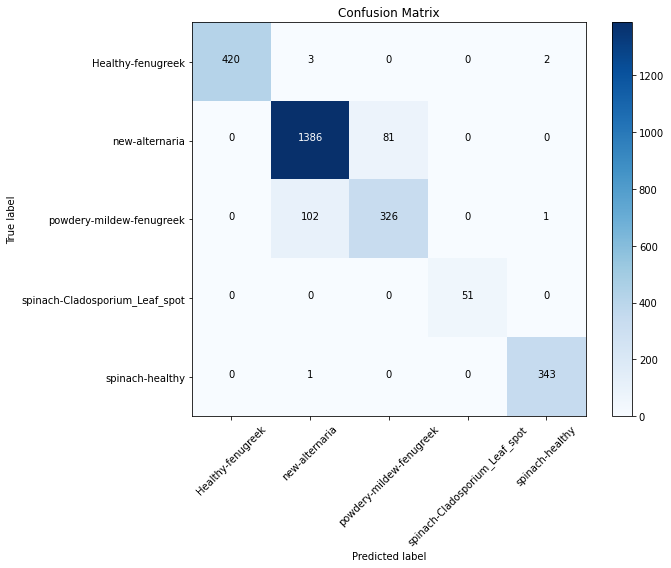

In [45]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import itertools

# Predict classes
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=-1)

# Extract true labels from the generator
true_labels = test_generator.classes
# Classification Report
print(classification_report(true_labels, predicted_classes, target_names=list(test_generator.class_indices.keys())))

# Accuracy
accuracy = np.mean(predicted_classes == true_labels)
print(f"Accuracy: {accuracy:.4f}")
# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 8))
plot_confusion_matrix(conf_matrix, classes=list(test_generator.class_indices.keys()), title='Confusion Matrix')
plt.savefig('mobilenet.png')
plt.show()


In [46]:
# Make predictions on the test data
predictions = model.predict(test_generator)

# Calculate True Positives, False Positives, True Negatives, and False Negatives
true_labels = test_generator.classes
predicted_labels = predictions.argmax(axis=1)
cm = confusion_matrix(true_labels, predicted_labels)

# Calculate Sensitivity (True Positive Rate)
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# Calculate Specificity (True Negative Rate)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

# Calculate Recall (same as Sensitivity)
recall = sensitivity

# Calculate F-measure
precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])
f_measure = 2 * (precision * recall) / (precision + recall)

# Calculate Matthews Correlation Coefficient (MCC)
mcc = (cm[0, 0] * cm[1, 1] - cm[0, 1] * cm[1, 0]) / ((cm[0, 0] + cm[0, 1]) * (cm[1, 0] + cm[1, 1]))


68/68 [==============================] - 14s 199ms/step


In [55]:
data_dir = 'Original_Dataset/'

In [71]:
from tensorflow.keras.applications import MobileNetV2, VGG16, ResNet50, InceptionV3, DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def create_model(architecture_name='MobileNetV2', num_classes=5, learning_rate=0.0001):
    input_tensor = Input(shape=(224, 224, 3))
    base_model = None
    
    if architecture_name == 'MobileNetV2':
        base_model = MobileNetV2(include_top=False, input_tensor=input_tensor, weights='imagenet')
    elif architecture_name == 'VGG16':
        base_model = VGG16(include_top=False, input_tensor=input_tensor, weights='imagenet')
    elif architecture_name == 'ResNet50':
        base_model = ResNet50(include_top=False, input_tensor=input_tensor, weights='imagenet')
    elif architecture_name == 'InceptionV3':
        base_model = InceptionV3(include_top=False, input_tensor=input_tensor, weights='imagenet')
    elif architecture_name == 'DenseNet121':
        base_model = DenseNet121(include_top=False, input_tensor=input_tensor, weights='imagenet')
    else:
        raise ValueError("Unsupported architecture")

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=predictions)
    for layer in base_model.layers:
        layer.trainable = True
    
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [72]:
results_df = pd.DataFrame(columns=['CNN Archetecture', 'Sensitivity', 'Specificity', 'Accuracy', 'Recall', 'F-measure', 'MCC'])


In [73]:
architecture_names = ['MobileNetV2', 'VGG16', 'ResNet50', 'InceptionV3', 'DenseNet121']

for architecture_name in architecture_names:
    print(f"Training {architecture_name}...")
    model = create_model(architecture_name=architecture_name, num_classes=num_classes, learning_rate=0.0001)
    
    # Assuming you have defined train_generator and val_generator
    history = model.fit(train_generator, epochs=70, validation_data=val_generator)
    
    # Evaluate on test set
    test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
    print(f"{architecture_name} Test Loss: {test_loss}")
    print(f"{architecture_name} Test Accuracy: {test_accuracy}")
    predictions = model.predict(test_generator)
    
    # Calculate True Positives, False Positives, True Negatives, and False Negatives
    true_labels = test_generator.classes
    predicted_labels = predictions.argmax(axis=1)
    cm = confusion_matrix(true_labels, predicted_labels)
    
    # Calculate Sensitivity (True Positive Rate)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    
    # Calculate Specificity (True Negative Rate)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    
    # Calculate Recall (same as Sensitivity)
    recall = sensitivity
    
    # Calculate F-measure
    precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])
    f_measure = 2 * (precision * recall) / (precision + recall)
    
    # Calculate Matthews Correlation Coefficient (MCC)
    mcc = (cm[0, 0] * cm[1, 1] - cm[0, 1] * cm[1, 0]) / ((cm[0, 0] + cm[0, 1]) * (cm[1, 0] + cm[1, 1]))
    
    accuracy = test_accuracy
    model.save(f'{architecture_name}_model_orginal_dataset.h5')
    
    new_row = pd.DataFrame([{
    'CNN Archetecture': {architecture_name},
    'Sensitivity': sensitivity,
    'Specificity': specificity,
    'Accuracy': accuracy,
    'Recall': recall,
    'F-measure': f_measure,
    'MCC': mcc
}])


    results_df = pd.concat([results_df, new_row], ignore_index=True)
    
    # Optionally, save model and plot accuracy/loss graphs here


Training MobileNetV2...
Epoch 1/70
26/26 [==============================] - 51s 1s/step - loss: 0.9931 - accuracy: 0.6358 - val_loss: 1.7771 - val_accuracy: 0.2273
Epoch 2/70
26/26 [==============================] - 40s 2s/step - loss: 0.4261 - accuracy: 0.8438 - val_loss: 1.9215 - val_accuracy: 0.2727
Epoch 3/70
26/26 [==============================] - 35s 1s/step - loss: 0.3090 - accuracy: 0.8776 - val_loss: 1.7837 - val_accuracy: 0.4545
Epoch 4/70
26/26 [==============================] - 41s 2s/step - loss: 0.2542 - accuracy: 0.8935 - val_loss: 2.0199 - val_accuracy: 0.2727
Epoch 5/70
26/26 [==============================] - 36s 1s/step - loss: 0.1964 - accuracy: 0.9204 - val_loss: 3.1839 - val_accuracy: 0.2273
Epoch 6/70
26/26 [==============================] - 43s 2s/step - loss: 0.1910 - accuracy: 0.9184 - val_loss: 2.1698 - val_accuracy: 0.2955
Epoch 7/70
26/26 [==============================] - 40s 2s/step - loss: 0.1458 - accuracy: 0.9473 - val_loss: 1.9848 - val_accuracy: 0.3

Epoch 58/70
26/26 [==============================] - 41s 2s/step - loss: 0.0578 - accuracy: 0.9682 - val_loss: 9.4247 - val_accuracy: 0.2273
Epoch 59/70
26/26 [==============================] - 44s 2s/step - loss: 0.0670 - accuracy: 0.9632 - val_loss: 7.7181 - val_accuracy: 0.3409
Epoch 60/70
26/26 [==============================] - 45s 2s/step - loss: 0.0591 - accuracy: 0.9701 - val_loss: 5.5086 - val_accuracy: 0.4091
Epoch 61/70
26/26 [==============================] - 41s 2s/step - loss: 0.0742 - accuracy: 0.9692 - val_loss: 6.9907 - val_accuracy: 0.3182
Epoch 62/70
26/26 [==============================] - 41s 2s/step - loss: 0.0485 - accuracy: 0.9811 - val_loss: 8.3544 - val_accuracy: 0.3636
Epoch 63/70
26/26 [==============================] - 42s 2s/step - loss: 0.0611 - accuracy: 0.9662 - val_loss: 7.0336 - val_accuracy: 0.3864
Epoch 64/70
26/26 [==============================] - 47s 2s/step - loss: 0.0721 - accuracy: 0.9701 - val_loss: 4.0136 - val_accuracy: 0.4773
Epoch 65/70
2

26/26 [==============================] - 41s 2s/step - loss: 0.0849 - accuracy: 0.9582 - val_loss: 2.2931 - val_accuracy: 0.2500
Epoch 31/70
26/26 [==============================] - 37s 1s/step - loss: 0.0775 - accuracy: 0.9692 - val_loss: 1.5096 - val_accuracy: 0.2955
Epoch 32/70
26/26 [==============================] - 39s 2s/step - loss: 0.0710 - accuracy: 0.9672 - val_loss: 1.8716 - val_accuracy: 0.2955
Epoch 33/70
26/26 [==============================] - 36s 1s/step - loss: 0.0648 - accuracy: 0.9711 - val_loss: 2.3869 - val_accuracy: 0.3182
Epoch 34/70
26/26 [==============================] - 41s 2s/step - loss: 0.0566 - accuracy: 0.9711 - val_loss: 1.7460 - val_accuracy: 0.4318
Epoch 35/70
26/26 [==============================] - 47s 2s/step - loss: 0.0668 - accuracy: 0.9652 - val_loss: 1.9489 - val_accuracy: 0.5000
Epoch 36/70
26/26 [==============================] - 44s 2s/step - loss: 0.0648 - accuracy: 0.9632 - val_loss: 1.4763 - val_accuracy: 0.4545
Epoch 37/70
26/26 [======

26/26 [==============================] - 39s 1s/step - loss: 0.3334 - accuracy: 0.8746 - val_loss: 0.8533 - val_accuracy: 0.6818
Epoch 3/70
26/26 [==============================] - 38s 1s/step - loss: 0.2234 - accuracy: 0.9154 - val_loss: 0.8642 - val_accuracy: 0.6818
Epoch 4/70
26/26 [==============================] - 42s 2s/step - loss: 0.1874 - accuracy: 0.9244 - val_loss: 0.6031 - val_accuracy: 0.7727
Epoch 5/70
26/26 [==============================] - 41s 2s/step - loss: 0.1597 - accuracy: 0.9333 - val_loss: 0.5651 - val_accuracy: 0.7955
Epoch 6/70
26/26 [==============================] - 38s 1s/step - loss: 0.1432 - accuracy: 0.9383 - val_loss: 0.7340 - val_accuracy: 0.6818
Epoch 7/70
26/26 [==============================] - 40s 2s/step - loss: 0.1342 - accuracy: 0.9463 - val_loss: 0.6611 - val_accuracy: 0.8182
Epoch 8/70
26/26 [==============================] - 34s 1s/step - loss: 0.1195 - accuracy: 0.9522 - val_loss: 0.6128 - val_accuracy: 0.7500
Epoch 9/70
26/26 [=============

In [74]:
results_df.to_excel('comparison_original.xlsx')

In [1]:
import pandas as pd

In [12]:
df= pd.read_excel('comparison_original.xlsx')

In [13]:
df

,Unnamed: 0,CNN Archetecture,Sensitivity,Specificity,Accuracy,Recall,F-measure,MCC
0,0,MobileNetV2,0.990566,1,0.677835,0.990566,0.995261,0.990566
1,1,VGG16,0.995074,1,0.904639,0.995074,0.997531,0.995074
2,2,ResNet50,0.989474,1,0.899485,0.989474,0.994709,0.989474
3,3,InceptionV3,1.000000,1,0.922680,1.000000,1.000000,1.000000
4,4,DenseNet121,1.000000,1,0.920103,1.000000,1.000000,1.000000


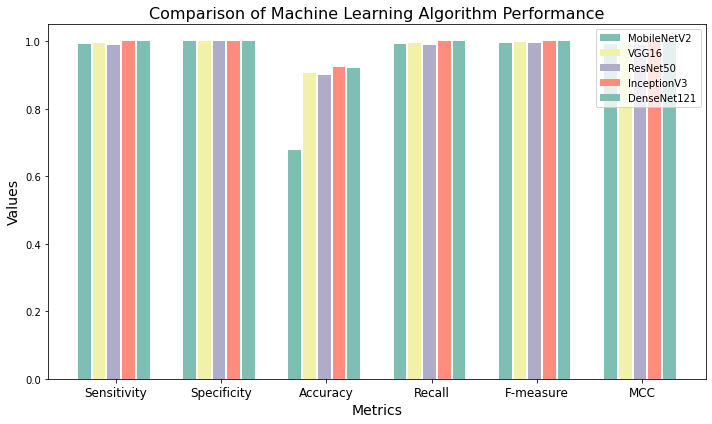

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame 'df')
# data = {
#     'Machine learning methods': ['DL_Apple/', 'DL_tomato/', 'DL_Grape/', 'DL_corn/'],
#     'Sensitivity': df[],
#     'Specificity': [0.702128, 0.475543, 0.815126, 0.981818],
#     'Accuracy': [0.626168, 0.717548, 0.802188, 0.945192],
#     'Recall': [1, 1, 1, 1],
#     'F-measure': [0.857868, 0.705344, 0.971867, 0.996732],
#     'MCC': [0.702128, 0.475543, 0.815126, 0.981818]
# }
# df = pd.DataFrame(data)

# Categories (metrics)
categories = ['Sensitivity', 'Specificity', 'Accuracy', 'Recall', 'F-measure', 'MCC']

# Algorithms
algorithms = df['CNN Archetecture']

# Extract data for each algorithm
data = np.array([
    df['Sensitivity'],
    df['Specificity'],
    df['Accuracy'],
    df['Recall'],
    df['F-measure'],
    df['MCC']
])

# Colors for each algorithm
colors =['#7fbeb3', '#f1f1a9', '#afacc9', '#ff8c7d']

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Set the bar width
bar_width = 0.12

# Set opacity for the bars
opacity = 1

# Position of the bar groups
bar_gap = 0.02
index = np.arange(len(categories))

# Plotting the bars for each algorithm
for i, algorithm in enumerate(algorithms):
    ax.bar(index + i * (bar_width + bar_gap), data[:, i], bar_width, alpha=opacity, color=colors[i % len(colors)], label=algorithm)

# Set the title and labels
ax.set_xlabel('Metrics', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
ax.set_title('Comparison of Machine Learning Algorithm Performance', fontsize=16)
ax.set_xticks(index + bar_width  * len(algorithms) / 2)
ax.set_xticklabels(categories, fontsize=12)

# Create legend & Show graphic
ax.legend()

# Set the background color
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Remove the grid
ax.grid(False)

# Tight layout
plt.tight_layout()
plt.savefig('performance_metrix_model_with_activation.png')
# Show the plot
plt.show()


In [5]:
df= pd.read_excel('comparison.xlsx')

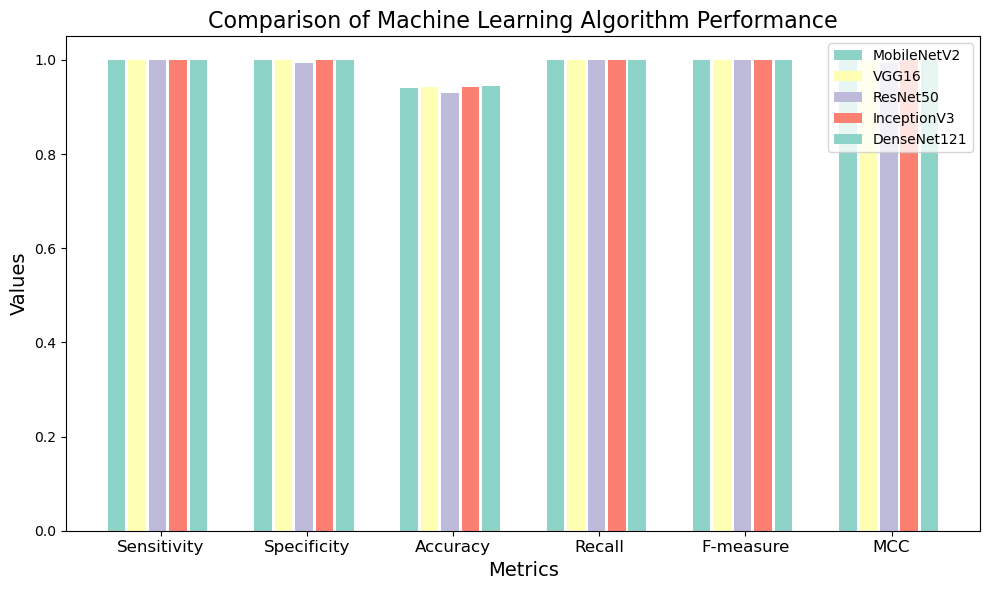

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame 'df')
# data = {
#     'Machine learning methods': ['DL_Apple/', 'DL_tomato/', 'DL_Grape/', 'DL_corn/'],
#     'Sensitivity': df[],
#     'Specificity': [0.702128, 0.475543, 0.815126, 0.981818],
#     'Accuracy': [0.626168, 0.717548, 0.802188, 0.945192],
#     'Recall': [1, 1, 1, 1],
#     'F-measure': [0.857868, 0.705344, 0.971867, 0.996732],
#     'MCC': [0.702128, 0.475543, 0.815126, 0.981818]
# }
# df = pd.DataFrame(data)

# Categories (metrics)
categories = ['Sensitivity', 'Specificity', 'Accuracy', 'Recall', 'F-measure', 'MCC']

# Algorithms
algorithms = df['CNN Archetecture']

# Extract data for each algorithm
data = np.array([
    df['Sensitivity'],
    df['Specificity'],
    df['Accuracy'],
    df['Recall'],
    df['F-measure'],
    df['MCC']
])

# Colors for each algorithm
colors = ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072']

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Set the bar width
bar_width = 0.12

# Set opacity for the bars
opacity = 1

# Position of the bar groups
bar_gap = 0.02
index = np.arange(len(categories))

# Plotting the bars for each algorithm
for i, algorithm in enumerate(algorithms):
    ax.bar(index + i * (bar_width + bar_gap), data[:, i], bar_width, alpha=opacity, color=colors[i % len(colors)], label=algorithm)

# Set the title and labels
ax.set_xlabel('Metrics', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
ax.set_title('Comparison of Machine Learning Algorithm Performance', fontsize=16)
ax.set_xticks(index + bar_width  * len(algorithms) / 2)
ax.set_xticklabels(categories, fontsize=12)

# Create legend & Show graphic
ax.legend()

# Set the background color
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Remove the grid
ax.grid(False)

# Tight layout
plt.tight_layout()
plt.savefig('performance_metrix_model_with_original.png')
# Show the plot
plt.show()


In [ ]:
import model


In [3]:
data_dir = 'Preprocessed_Dataset//'
class_folders = os.listdir(data_dir)
image_paths = []
labels = []
batch_size = 40
for class_folder in class_folders:
    class_path = os.path.join(data_dir, class_folder)
    image_files = os.listdir(class_path)
    for image_file in image_files:
        image_path = os.path.join(class_path, image_file)
        image_paths.append(image_path)
        labels.append(class_folder)

df = pd.DataFrame({'image_path': image_paths, 'label': labels})
print('path of the image: ',df.loc[1]['image_path'])
print('label of the certain image: ',df.loc[1]['label'])
train_df, test_df = train_test_split(df, test_size=0.3, stratify=df['label'], random_state=42)
test_df, val_df = train_test_split(test_df, test_size=0.1, stratify=test_df['label'], random_state=42)
train_datagen = ImageDataGenerator(

    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='sparse'  # Changed from 'categorical' to 'sparse'
)
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='sparse'  # Changed from 'categorical' to 'sparse'
)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='sparse',  # Changed from 'categorical' to 'sparse'
    shuffle=False
)


class_labels_dict = {class_label: idx for idx, class_label in enumerate(np.unique(df['label']))}
num_classes = len(class_labels_dict)

path of the image:  Preprocessed_Dataset//Healthy-fenugreek/20240316_204948_crop_rotated_flipped.png
label of the certain image:  Healthy-fenugreek
Found 7041 validated image filenames belonging to 5 classes.
Found 302 validated image filenames belonging to 5 classes.
Found 2716 validated image filenames belonging to 5 classes.


In [26]:
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
import numpy as np
architecture_names = ['MobileNetV2', 'VGG16', 'ResNet50', 'InceptionV3', 'DenseNet121']
for architecture_name in architecture_names:    
    modela = f'{architecture_name}_model_orginal_dataset.h5'
    model = load_model(modela)
    # Assuming test_generator has shuffle=False
    # Predict the classes with the model
    predictions = model.predict(test_generator, steps=len(test_generator))
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Get the true classes
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())  # Getting the labels from the generator
    
    # Calculate the confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    
    # Function to calculate sensitivity and specificity
    def sensitivity_specificity(cm, class_idx):
        # Sensitivity (Recall or True Positive Rate) for class class_idx
        sensitivity = cm[class_idx, class_idx] / cm[class_idx, :].sum()
        
        # Specificity (True Negative Rate) for class class_idx
        true_negative = np.delete(np.delete(cm, class_idx, axis=0), class_idx, axis=1).sum()
        false_positive = np.delete(cm[class_idx, :], class_idx).sum()
        specificity = true_negative / (true_negative + false_positive)
        
        return sensitivity, specificity
    
    # Calculate sensitivity and specificity for each class
    for i, class_label in enumerate(class_labels):
        sens, spec = sensitivity_specificity(cm, i)
        print(f'Class: {class_label} - Sensitivity (Recall): {sens:.4f}, Specificity: {spec:.4f}')
    


2024-04-01 12:34:36.721352: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 49s 5s/step
Class: Healthy-fenugreek - Sensitivity (Recall): 0.8033, Specificity: 0.9642
Class: new-alternaria - Sensitivity (Recall): 0.4928, Specificity: 0.6228
Class: powdery-mildew-fenugreek - Sensitivity (Recall): 0.9344, Specificity: 0.9812
Class: spinach-Cladosporium Leaf spot - Sensitivity (Recall): 0.8571, Specificity: 0.9974
Class: spinach-healthy - Sensitivity (Recall): 0.9200, Specificity: 0.9883


2024-04-01 12:35:29.666845: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 51s 5s/step
Class: Healthy-fenugreek - Sensitivity (Recall): 1.0000, Specificity: 1.0000
Class: new-alternaria - Sensitivity (Recall): 0.9665, Specificity: 0.9551
Class: powdery-mildew-fenugreek - Sensitivity (Recall): 0.5082, Specificity: 0.9145
Class: spinach-Cladosporium Leaf spot - Sensitivity (Recall): 1.0000, Specificity: 1.0000
Class: spinach-healthy - Sensitivity (Recall): 1.0000, Specificity: 1.0000


2024-04-01 12:36:26.071492: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 111s 11s/step
Class: Healthy-fenugreek - Sensitivity (Recall): 0.9836, Specificity: 0.9969
Class: new-alternaria - Sensitivity (Recall): 0.8995, Specificity: 0.8906
Class: powdery-mildew-fenugreek - Sensitivity (Recall): 0.8525, Specificity: 0.9718
Class: spinach-Cladosporium Leaf spot - Sensitivity (Recall): 1.0000, Specificity: 1.0000
Class: spinach-healthy - Sensitivity (Recall): 0.8600, Specificity: 0.9797


2024-04-01 12:38:22.346031: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 41s 4s/step
Class: Healthy-fenugreek - Sensitivity (Recall): 1.0000, Specificity: 1.0000
Class: new-alternaria - Sensitivity (Recall): 0.9522, Specificity: 0.9412
Class: powdery-mildew-fenugreek - Sensitivity (Recall): 0.6885, Specificity: 0.9435
Class: spinach-Cladosporium Leaf spot - Sensitivity (Recall): 0.8571, Specificity: 0.9974
Class: spinach-healthy - Sensitivity (Recall): 1.0000, Specificity: 1.0000


2024-04-01 12:39:08.764034: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 96s 9s/step
Class: Healthy-fenugreek - Sensitivity (Recall): 1.0000, Specificity: 1.0000
Class: new-alternaria - Sensitivity (Recall): 0.9234, Specificity: 0.9111
Class: powdery-mildew-fenugreek - Sensitivity (Recall): 0.7541, Specificity: 0.9541
Class: spinach-Cladosporium Leaf spot - Sensitivity (Recall): 1.0000, Specificity: 1.0000
Class: spinach-healthy - Sensitivity (Recall): 1.0000, Specificity: 1.0000


10/10 [==============================] - 14s 1s/step
                                precision    recall  f1-score   support

             Healthy-fenugreek       0.92      0.80      0.86        61
                new-alternaria       0.96      0.50      0.66       209
      powdery-mildew-fenugreek       0.33      0.93      0.49        61
spinach-Cladosporium Leaf spot       1.00      0.86      0.92         7
               spinach-healthy       0.98      0.92      0.95        50

                      accuracy                           0.68       388
                     macro avg       0.84      0.80      0.78       388
                  weighted avg       0.86      0.68      0.71       388

Accuracy: 0.6778


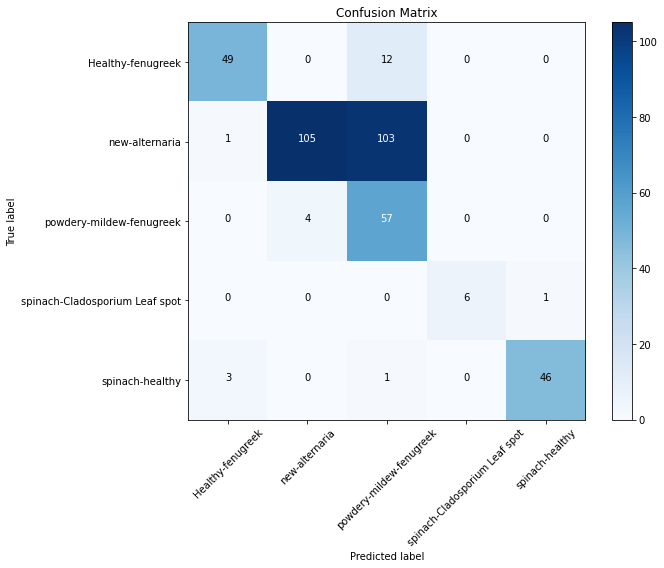

10/10 [==============================] - 14s 1s/step
                                precision    recall  f1-score   support

             Healthy-fenugreek       0.98      1.00      0.99        61
                new-alternaria       0.87      0.97      0.92       209
      powdery-mildew-fenugreek       0.84      0.51      0.63        61
spinach-Cladosporium Leaf spot       1.00      1.00      1.00         7
               spinach-healthy       1.00      1.00      1.00        50

                      accuracy                           0.90       388
                     macro avg       0.94      0.89      0.91       388
                  weighted avg       0.90      0.90      0.90       388

Accuracy: 0.9046


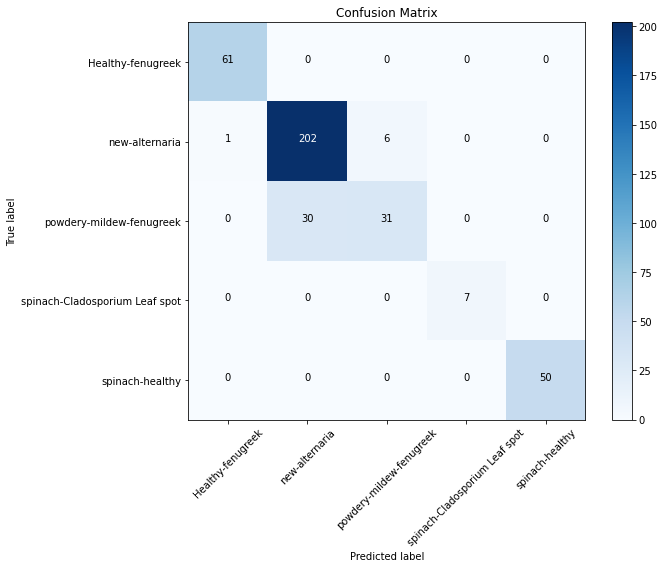

10/10 [==============================] - 15s 1s/step
                                precision    recall  f1-score   support

             Healthy-fenugreek       0.97      0.98      0.98        61
                new-alternaria       0.95      0.90      0.93       209
      powdery-mildew-fenugreek       0.75      0.84      0.79        61
spinach-Cladosporium Leaf spot       0.39      1.00      0.56         7
               spinach-healthy       1.00      0.86      0.92        50

                      accuracy                           0.90       388
                     macro avg       0.81      0.92      0.84       388
                  weighted avg       0.92      0.90      0.91       388

Accuracy: 0.8995


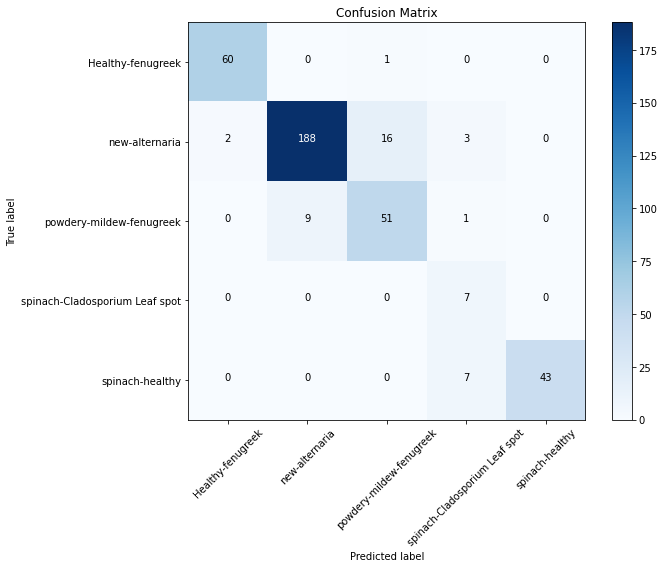

10/10 [==============================] - 14s 1s/step
                                precision    recall  f1-score   support

             Healthy-fenugreek       1.00      1.00      1.00        61
                new-alternaria       0.91      0.95      0.93       209
      powdery-mildew-fenugreek       0.81      0.69      0.74        61
spinach-Cladosporium Leaf spot       1.00      0.86      0.92         7
               spinach-healthy       0.98      1.00      0.99        50

                      accuracy                           0.92       388
                     macro avg       0.94      0.90      0.92       388
                  weighted avg       0.92      0.92      0.92       388

Accuracy: 0.9227


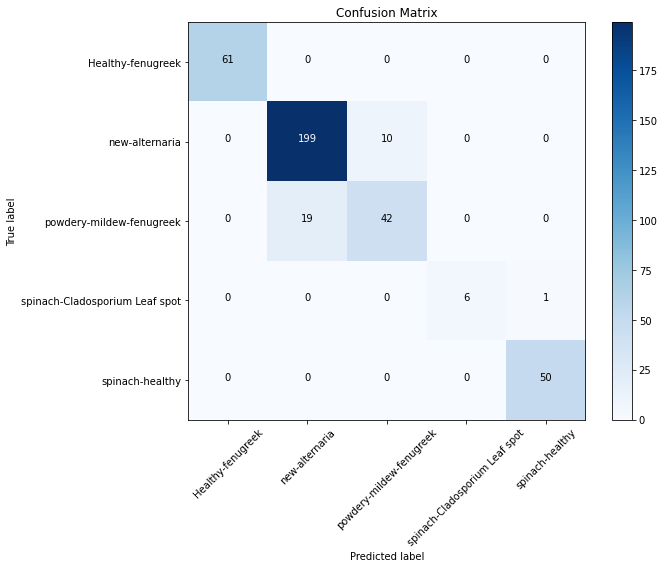

10/10 [==============================] - 15s 1s/step
                                precision    recall  f1-score   support

             Healthy-fenugreek       1.00      1.00      1.00        61
                new-alternaria       0.93      0.92      0.93       209
      powdery-mildew-fenugreek       0.75      0.75      0.75        61
spinach-Cladosporium Leaf spot       0.88      1.00      0.93         7
               spinach-healthy       1.00      1.00      1.00        50

                      accuracy                           0.92       388
                     macro avg       0.91      0.94      0.92       388
                  weighted avg       0.92      0.92      0.92       388

Accuracy: 0.9201


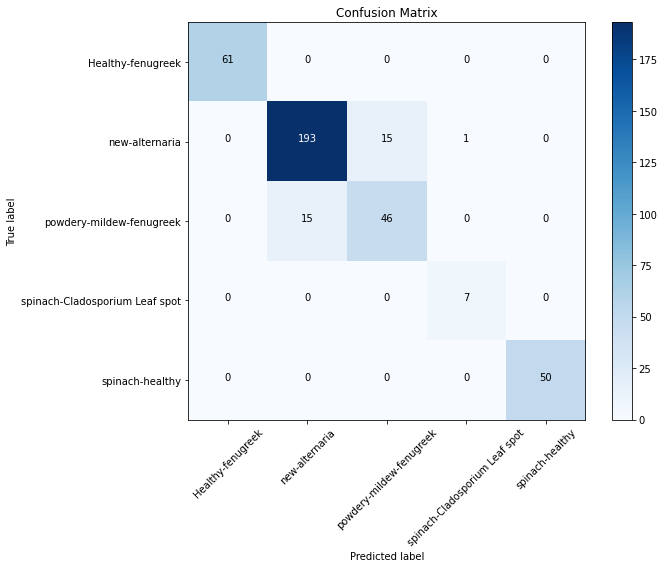

In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import itertools
architecture_names = ['MobileNetV2', 'VGG16', 'ResNet50', 'InceptionV3', 'DenseNet121']
for architecture_name in architecture_names:    
    modela = f'{architecture_name}_model_orginal_dataset.h5'
    model = load_model(modela)
    # Predict classes
    predictions = model.predict(test_generator)
    predicted_classes = np.argmax(predictions, axis=-1)
    
    # Extract true labels from the generator
    true_labels = test_generator.classes
    # Classification Report
    print(classification_report(true_labels, predicted_classes, target_names=list(test_generator.class_indices.keys())))
    
    # Accuracy
    accuracy = np.mean(predicted_classes == true_labels)
    print(f"Accuracy: {accuracy:.4f}")
    # Confusion Matrix
    conf_matrix = confusion_matrix(true_labels, predicted_classes)
    
    def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
    
    # Plot non-normalized confusion matrix
    plt.figure(figsize=(10, 8))
    plot_confusion_matrix(conf_matrix, classes=list(test_generator.class_indices.keys()), title='Confusion Matrix')
    plt.savefig(modela+'.png')
    plt.show()

68/68 [==============================] - 19s 231ms/step
                                precision    recall  f1-score   support

             Healthy-fenugreek       1.00      1.00      1.00       425
                new-alternaria       0.96      0.93      0.95      1467
      powdery-mildew-fenugreek       0.78      0.89      0.83       429
spinach-Cladosporium_Leaf_spot       1.00      1.00      1.00        51
               spinach-healthy       1.00      0.99      1.00       344

                      accuracy                           0.94      2716
                     macro avg       0.95      0.96      0.95      2716
                  weighted avg       0.95      0.94      0.94      2716

Accuracy: 0.9411


<Figure size 864x720 with 0 Axes>

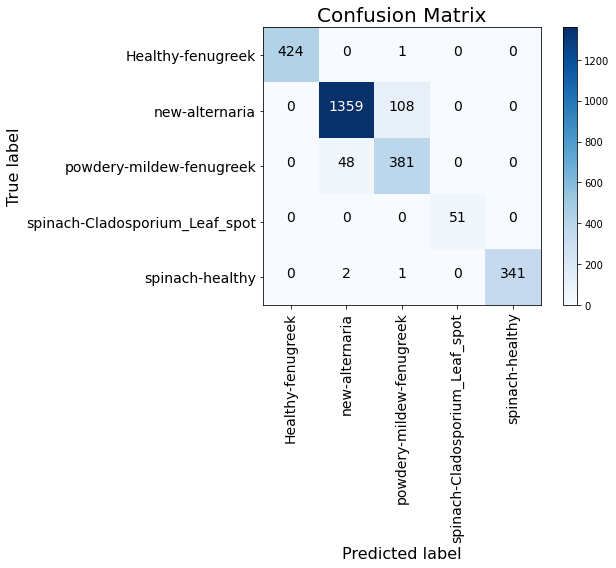

68/68 [==============================] - 17s 232ms/step
                                precision    recall  f1-score   support

             Healthy-fenugreek       1.00      1.00      1.00       425
                new-alternaria       0.93      0.97      0.95      1467
      powdery-mildew-fenugreek       0.88      0.75      0.81       429
spinach-Cladosporium_Leaf_spot       0.94      1.00      0.97        51
               spinach-healthy       1.00      0.99      0.99       344

                      accuracy                           0.94      2716
                     macro avg       0.95      0.94      0.94      2716
                  weighted avg       0.94      0.94      0.94      2716

Accuracy: 0.9418


<Figure size 864x720 with 0 Axes>

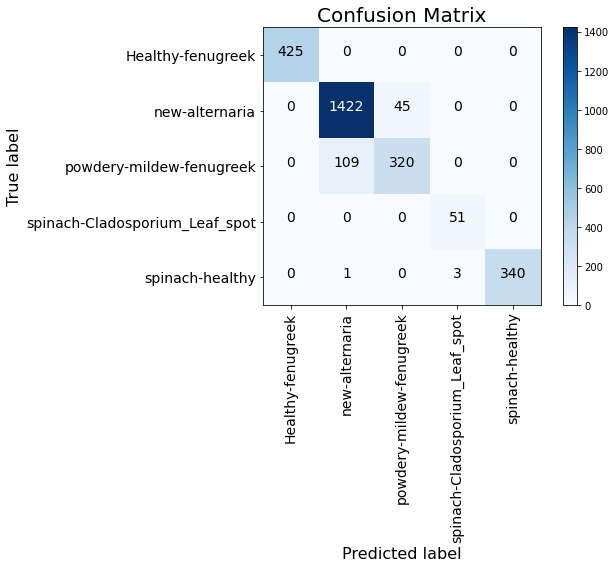

68/68 [==============================] - 18s 240ms/step
                                precision    recall  f1-score   support

             Healthy-fenugreek       1.00      0.99      1.00       425
                new-alternaria       0.95      0.92      0.94      1467
      powdery-mildew-fenugreek       0.76      0.86      0.80       429
spinach-Cladosporium_Leaf_spot       0.92      0.96      0.94        51
               spinach-healthy       0.99      1.00      1.00       344

                      accuracy                           0.93      2716
                     macro avg       0.93      0.95      0.93      2716
                  weighted avg       0.93      0.93      0.93      2716

Accuracy: 0.9304


<Figure size 864x720 with 0 Axes>

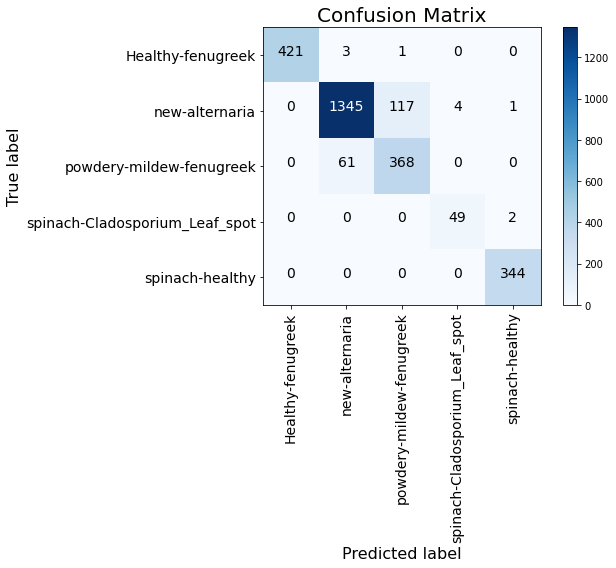

68/68 [==============================] - 18s 231ms/step
                                precision    recall  f1-score   support

             Healthy-fenugreek       1.00      1.00      1.00       425
                new-alternaria       0.93      0.97      0.95      1467
      powdery-mildew-fenugreek       0.87      0.75      0.81       429
spinach-Cladosporium_Leaf_spot       1.00      1.00      1.00        51
               spinach-healthy       1.00      1.00      1.00       344

                      accuracy                           0.94      2716
                     macro avg       0.96      0.94      0.95      2716
                  weighted avg       0.94      0.94      0.94      2716

Accuracy: 0.9433


<Figure size 864x720 with 0 Axes>

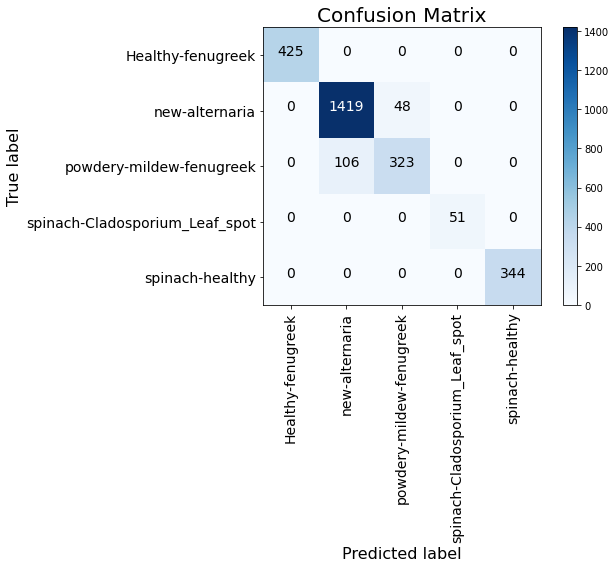

68/68 [==============================] - 15s 196ms/step
                                precision    recall  f1-score   support

             Healthy-fenugreek       1.00      1.00      1.00       425
                new-alternaria       0.94      0.96      0.95      1467
      powdery-mildew-fenugreek       0.85      0.79      0.82       429
spinach-Cladosporium_Leaf_spot       1.00      1.00      1.00        51
               spinach-healthy       1.00      0.99      1.00       344

                      accuracy                           0.94      2716
                     macro avg       0.96      0.95      0.95      2716
                  weighted avg       0.94      0.94      0.94      2716

Accuracy: 0.9440


<Figure size 864x720 with 0 Axes>

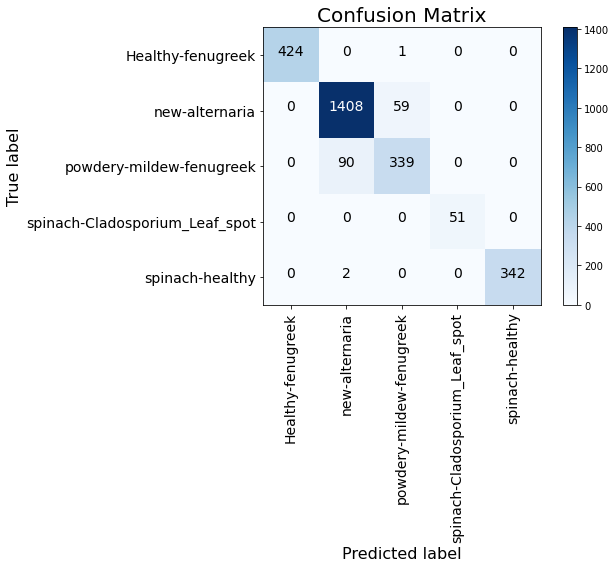

In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import itertools
architecture_names = ['MobileNetV2', 'VGG16', 'ResNet50', 'InceptionV3', 'DenseNet121']
for architecture_name in architecture_names:    
    modela = f'{architecture_name}_model.h5'
    model = load_model(modela)
    # Predict classes
    predictions = model.predict(test_generator)
    predicted_classes = np.argmax(predictions, axis=-1)
    
    # Extract true labels from the generator
    true_labels = test_generator.classes
    # Classification Report
    print(classification_report(true_labels, predicted_classes, target_names=list(test_generator.class_indices.keys())))
    
    # Accuracy
    accuracy = np.mean(predicted_classes == true_labels)
    print(f"Accuracy: {accuracy:.4f}")
    # Confusion Matrix
    conf_matrix = confusion_matrix(true_labels, predicted_classes)
    
    def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
        
        plt.figure(figsize=(10, 8))  # Move the figure size specification inside the function for clarity
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title, fontsize=20)  # Set title font size
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        
        # Specify font size and rotation for x-ticks and y-ticks
        plt.xticks(tick_marks, classes, rotation=90, fontsize=14)  # Rotate x-axis labels to 90 degrees
        plt.yticks(tick_marks, classes, fontsize=14)
        
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black",
                     fontsize=14)  # Set text font size in the cells
    
        plt.ylabel('True label', fontsize=16)  # Set ylabel font size
        plt.xlabel('Predicted label', fontsize=16)  # Set xlabel font size
        plt.tight_layout()
    plt.figure(figsize=(12, 10))
    plot_confusion_matrix(conf_matrix, classes=list(test_generator.class_indices.keys()), title='Confusion Matrix')
    plt.savefig(modela+'.png')
    plt.show()


In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam

class SelfAttention(Layer):
    def __init__(self, **kwargs):
        super(SelfAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.w_q = self.add_weight(name='q_kernel',    
                                   shape=(input_shape[-1], input_shape[-1]),
                                   initializer='uniform',
                                   trainable=True)
        self.w_k = self.add_weight(name='k_kernel',
                                   shape=(input_shape[-1], input_shape[-1]),
                                   initializer='uniform',
                                   trainable=True)
        self.w_v = self.add_weight(name='v_kernel',
                                   shape=(input_shape[-1], input_shape[-1]),
                                   initializer='uniform',
                                   trainable=True)
        super(SelfAttention, self).build(input_shape)

    def call(self, x):    
        q = tf.matmul(x, self.w_q)
        k = tf.matmul(x, self.w_k)
        v = tf.matmul(x, self.w_v)
        attn_scores = tf.matmul(q, k, transpose_b=True)
        attn_scores = tf.nn.softmax(attn_scores, axis=-1)
        output = tf.matmul(attn_scores, v)
        return output


# MobileNetV2 with attention mechanism

input_tensor = Input(shape=(224, 224, 3))

# Now you can define your base_model with the input_tensor
base_model = InceptionV3(include_top=False, input_tensor=input_tensor, weights='imagenet')

x = base_model.output
x = SelfAttention()(x)  # Add the attention mechanism layer here
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Include the Dropout layer
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
# Unfreeze more layers in the MobileNetV2 model
n = 40
for layer in model.layers[:-n]:
      layer.trainable = True

# Adjust the learning rate for fine-tuning
learning_rate_finetune = 0.00001
# Compile the model with the updated learning rate
model.compile(optimizer=Adam(learning_rate=learning_rate_finetune), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Fine-tuning
epochs_finetune = 70
history_finetune = model.fit(train_generator, epochs=epochs_finetune, validation_data=val_generator)

Epoch 1/70
177/177 [==============================] - 100s 400ms/step - loss: 1.1471 - accuracy: 0.5648 - val_loss: 0.6750 - val_accuracy: 0.7152
Epoch 2/70
177/177 [==============================] - 67s 375ms/step - loss: 0.6479 - accuracy: 0.7634 - val_loss: 0.3999 - val_accuracy: 0.8543
Epoch 3/70
177/177 [==============================] - 67s 379ms/step - loss: 0.4788 - accuracy: 0.8124 - val_loss: 0.3244 - val_accuracy: 0.8808
Epoch 4/70
177/177 [==============================] - 78s 439ms/step - loss: 0.3924 - accuracy: 0.8441 - val_loss: 0.2562 - val_accuracy: 0.8974
Epoch 5/70
177/177 [==============================] - 66s 372ms/step - loss: 0.3419 - accuracy: 0.8605 - val_loss: 0.2238 - val_accuracy: 0.9073
Epoch 6/70
177/177 [==============================] - 69s 392ms/step - loss: 0.2984 - accuracy: 0.8752 - val_loss: 0.1906 - val_accuracy: 0.9238
Epoch 7/70
177/177 [==============================] - 68s 382ms/step - loss: 0.2793 - accuracy: 0.8831 - val_loss: 0.1793 - val_a

In [11]:
model

In [16]:
from tensorflow.keras.models import load_model

# Path to your saved model
model_path = 'MobileNetV2_model.h5'
model = load_model(model_path)


In [17]:
import numpy as np

predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)  #Convert probabilities to class labels


68/68 [==============================] - 14s 196ms/step


In [22]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
y_true = test_generator.classes

accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='macro')  # Also known as Sensitivity
f1 = f1_score(y_true, y_pred, average='macro')
mcc = matthews_corrcoef(y_true, y_pred)

# Calculate Specificity and other class-specific metrics
conf_matrix = confusion_matrix(y_true, y_pred)
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TP = np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

# Average Specificity
specificity = np.mean(TNR)
